In [28]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [29]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)
 

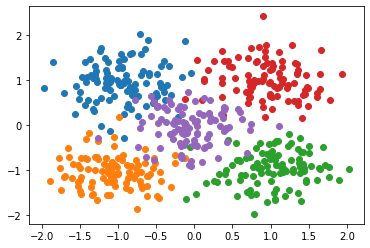

In [30]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 

In [31]:
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [32]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
#one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9752 - accuracy: 0.6480
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.8700
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.9340
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9440
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9380
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9480
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9500
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9460
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9440
Epoch 11/

In [34]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    pred_func= np.argmax(pred_func, axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

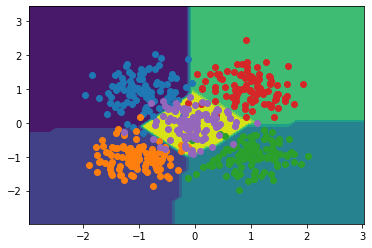

In [35]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])


Prediction is:  [[9.0504222e-04 3.5148168e-01 6.3563522e-04 1.2506393e-06 6.4697641e-01]]


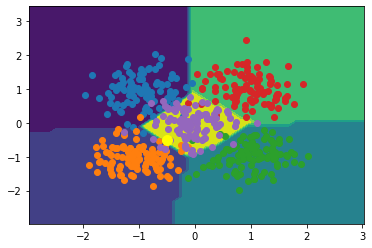

In [36]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)
